In [1]:
library(tidyverse)
library(tidytext)
library(textdata)
library(wordcloud)
library(syuzhet)
library(tm)
library(ggplot2)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘textdata’


The following object is masked from ‘package:httr’:

    cache_info


Loading required package: RColorBrewer

Loading required package: NLP


Attaching package: ‘NLP’


The following object is masked from ‘package:ggplot2’:

    annotate


The following object is masked from ‘package:httr’:

    content




In [2]:
data <- read.csv("/kaggle/input/tweets-onchatgpt-chatgpt/ChatGPT.csv")

In [3]:
# Check structure
glimpse(data)

Rows: 478,347
Columns: 13
$ X             <chr> "0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10", …
$ Date          <chr> "2023-04-08 03:33:13+00:00", "2023-04-08 03:32:16+00:00"…
$ Tweet         <chr> "#ChatGPT If only there were a movie or something that s…
$ Url           <chr> "https://twitter.com/kirbydjohnson/status/16445438945148…
$ User          <chr> "kirbydjohnson", "UniversityWeb", "AiNewsDrop", "tubeblo…
$ UserCreated   <chr> "2012-07-29 22:57:46+00:00", "2013-01-13 20:18:16+00:00"…
$ UserVerified  <chr> "False", "False", "False", "False", "False", "True", "Fa…
$ UserFollowers <int> 50, 9056, 276, 312, 522, 90392, 338, 1, 895, 1051, 300, …
$ UserFriends   <int> 76, 387, 313, 293, 684, 56, 53, 2, 635, 2439, 415, 6, 50…
$ Retweets      <chr> "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "…
$ Likes         <chr> "0", "0", "0", "0", "2", "0", "0", "2", "1", "1", "1", "…
$ Location      <chr> "", "", "", "The Internet", "Beograd Navodni", "New Delh…
$ Description 

In [4]:
data$clean_tweet <- data$Tweet %>%
  str_to_lower() %>%
  str_replace_all("http\\S+|www\\S+", "") %>%
  str_replace_all("[^[:alnum:] ]", " ")

# Step 1: Clean the "Tweet" column by removing unwanted elements
data$clean_tweet <- data$Tweet %>%
  # Convert text to lowercase
  str_to_lower() %>%
  # Remove URLs
  str_replace_all("http\\S+|www\\S+", "") %>%
  # Remove special characters, punctuation, and numbers
  str_replace_all("[^[:alnum:] ]", " ") %>%
  # Remove extra white spaces
  str_squish()

# Step 2: Check for any missing or NA values in the cleaned tweets
data <- data %>% filter(!is.na(clean_tweet) & clean_tweet != "")

# Preview cleaned tweets
head(data$clean_tweet)


[1] "chatgpt if only there were a movie or something that showed us how this all ends"                                                                                                                                                                           
[2] "workshop description in this workshop you will learn how to use chatgpt an advanced ai language model to generate creative ideas and solve problems in your innovation projects read more chatgpt ai learning"                                              
[3] "new post at ainewsdrop chatgpt is a doctor now sorta artificial intelligence chatgpt"                                                                                                                                                                       
[4] "openai s gpt 4 just got supercharged ai chatgpt"                                                                                                                                                                                                            
[5] "classical art is struggling not changed the fact that is disappearing artofficial it is important that 1 100 passes thousands and thousands will be made chatgpt chatgpt3 aiartwork ai aipad nft web3 chatgpt4 nftarti st aiart nftart nftjapan bing bingai"
[6] "alibaba invites businesses to trial chatgpt rival ai chatbot report alibaba chatgpt"

In [5]:
# Use the NRC lexicon for sentiment analysis
nrc_sentiments <- get_nrc_sentiment(data$clean_tweet)

# Summarize the emotions
emotion_summary <- colSums(nrc_sentiments)

# Create a data frame for visualization
emotion_df <- data.frame(
  Emotion = names(emotion_summary),
  Count = as.numeric(emotion_summary)
)

# Calculate percentages
emotion_df$Percentage <- (emotion_df$Count / sum(emotion_df$Count)) * 100


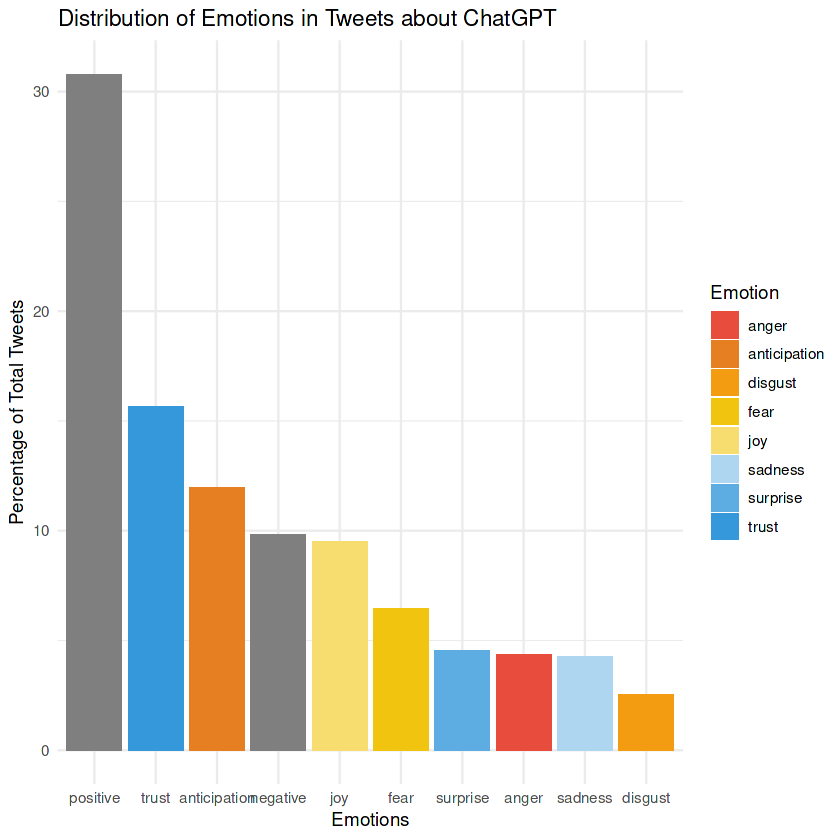

In [6]:
# Create the bar plot
ggplot(emotion_df, aes(x = reorder(Emotion, -Percentage), y = Percentage, fill = Emotion)) +
  geom_bar(stat = "identity") +
  scale_fill_manual(values = c(
    "anger" = "#E74C3C", "anticipation" = "#E67E22", "disgust" = "#F39C12",
    "fear" = "#F1C40F", "joy" = "#F7DC6F", "sadness" = "#AED6F1",
    "surprise" = "#5DADE2", "trust" = "#3498DB")) +
  labs(title = "Distribution of Emotions in Tweets about ChatGPT",
       x = "Emotions", y = "Percentage of Total Tweets") +
  theme_minimal()
